## LAB 03

In [33]:
from image_analyzer import Image_analyzer
import numpy as np
import matplotlib.pyplot as plt
import os

In [34]:
file_dir = os.getcwd()
images_dir = file_dir + "/images/"

fig_04_24_a_path = images_dir+"Fig0424(a)(rectangle).pgm"
print(fig_04_24_a_path)

fig_04_24_a_analyzer = Image_analyzer(fig_04_24_a_path)

fig_04_24_a_analyzer.mypgmread()



/Users/fuad/Documents/coding/image_processing_tutorials/004_frequency_domain_analyze/images/Fig0424(a)(rectangle).pgm
Reading image from: /Users/fuad/Documents/coding/image_processing_tutorials/004_frequency_domain_analyze/images/Fig0424(a)(rectangle).pgm


(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 1024,
 1024,
 255)

a) Using the my2Dfft function , first the single-dimensional Fourier transform of the columns was taken, then the rows, thus obtaining the image.

In [35]:
fig_04_24_a_fft = fig_04_24_a_analyzer.my2Dfft()


b) I also write the function my2Dft with the given formula but it takes so long to run so i stop it.

In [36]:
#fig_04_29_a_dft = fig_04_29_a_analyzer.my2Dft()

To center the fourier transform as showed in Fig 4.24(c) , the original image is multiplied with a mask of (-1)^(x+y)

In [37]:
fig_04_24_a_fft_centered = fig_04_24_a_analyzer.my2Dfftshifted()

In the following code the images is plotted

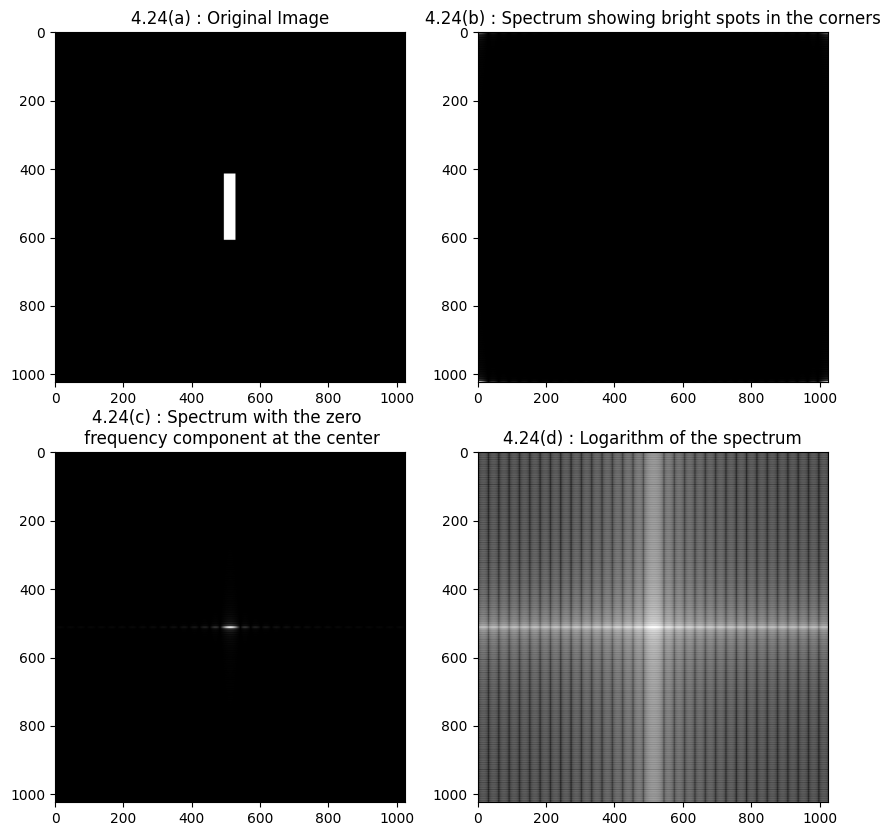

In [38]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(fig_04_24_a_analyzer.image_array, cmap='gray', vmin=0, vmax=255)
plt.title("4.24(a) : Original Image")
plt.subplot(2, 2, 2)
plt.imshow( Image_analyzer().image_array_scale( np.abs(fig_04_24_a_fft)), cmap='gray', vmin=0, vmax=255)
plt.title("4.24(b) : Spectrum showing bright spots in the corners")
plt.subplot(2, 2, 3)
plt.imshow( Image_analyzer().image_array_scale(np.abs(fig_04_24_a_fft_centered)), cmap='gray', vmin=0, vmax=255)
plt.title("4.24(c) : Spectrum with the zero \n frequency component at the center")
plt.subplot(2, 2, 4)
logarthmic_spectrum = np.log(1 + np.abs(fig_04_24_a_fft_centered))
plt.imshow( Image_analyzer().image_array_scale(logarthmic_spectrum), cmap='gray', vmin=0, vmax=255)
plt.title("4.24(d) : Logarithm of the spectrum")
plt.show()

To take the inverse fourier transform of the image the my2Difft function is written using the My2Dfft function.

In [39]:
fig_04_24_inversed = fig_04_24_a_analyzer.my2Difft(fig_04_24_a_fft)

Here the of figure 2.24(b) as input to the inverse fourier function and the original image is reobtained

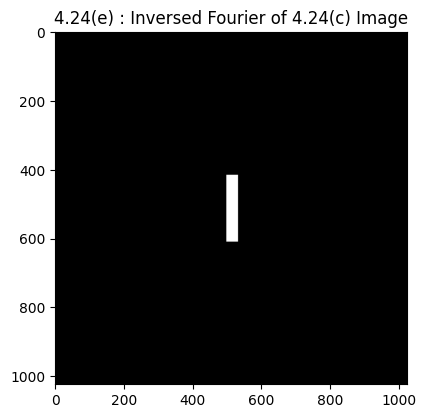

In [40]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(Image_analyzer().image_array_scale(np.abs(fig_04_24_inversed)), cmap='gray', vmin=0, vmax=255)
plt.title("4.24(e) : Inversed Fourier of 4.24(c) Image")
plt.show()


The absolute value of F can be obtained from the logarithmic spectrum by the following equations.
L = ln(1+ |F|) <br>
e^L = e^ln(1+|F|) = 1+ |F| <br>
e^L -1 = |F| <br>
But the inverse fourier can^t be obtained by given the abolute value (|F|) to the inverse fourier transform function because of the absolute, it requires F it self.

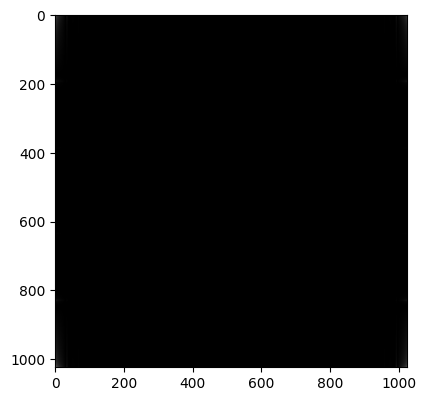

In [42]:
fig_04_24_inversed_log = fig_04_24_a_analyzer.my2Difft(np.exp(logarthmic_spectrum) - 1)
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(Image_analyzer().image_array_scale(np.abs(fig_04_24_inversed_log)), cmap='gray', vmin=0, vmax=255)
plt.show()